# PREPROCESSING AND EDA PART 1

## CONTENTS

__1.GETTING FAMILIAR WITH THE DATASET__
    
        
__2.INITIAL EDA__


__3.DATA CLEANING AND DATA PREPROCESSING__
        
    3.1 "binnedInc" CATEGORICAL VARIABLE
    3.2 "Geography" CATEGORICAL VARIABLE
    3.3 HANDLING MISSING VALUES
    3.4 OUTLIERS AND HIGH-LEVERAGE POINTS
      
__4.SAVING THE REFINED DATASET__


## 1. GETTING FAMILIAR WITH THE DATASET

The initial step involves understanding the organization of the data and identifying the types of information present within the dataset, such as numeric values or strings.

The majority of the data comprises numeric variables, either continuous or discrete, except for the 'Geography' column, which contains string values, and the 'binnedInc' column, which contains numeric values in the form of intervals.

Furthermore, it's important to address any missing values that may be present. It's evident that the dataset requires cleaning and preprocessing before it can be utilized by any model. The subsequent step involves transitioning to Python and initiating the cleaning and preprocessing procedures.

__Libraries__

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random as rndm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

__Importing data__

In [2]:
data = pd.read_csv("cancer_reg.csv", encoding='latin-1') # Endoding parameter is required
cancer_df = data.copy()
cancer_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096


Without the encoding paremeter, this error presents itself:
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 41137: invalid continuation byte

## 2. INITIAL EDA

In [3]:
cancer_df.describe() # Preliminary examination of the data.

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


Upon initial inspection, it's evident that certain variables exhibit High Leverage Points. This is indicated by the presence of maximum values significantly higher than the 75th percentile. Additionally, the standard deviation being 2 or 3 times greater than the mean suggests that the data for these variables are widely dispersed, further confirming the presence of outliers.

In [4]:
cancer_df.isnull().sum() # Checking for missing values

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

Very few variables have missing data. It is probably best for missing values to be dropped. 

In [5]:
cancer_df.dtypes # Checking the data types

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

All variables within the dataset are numeric, represented either as integers or floats, except for the columns labeled "Geography" and "binnedInc." These columns are characterized by the "object" data type, indicating they contain non-numeric data such as strings.

## 3. DATA CLEANING AND DATA PREPROCESSING

### 3.1 "binnedInc" CATEGORICAL VARIABLE

The "binnedInc" column comprises numeric data presented as intervals in string format.

In [6]:
print(type(cancer_df['binnedInc'][0])) # Printing the data type 

<class 'str'>


In [7]:
cancer_df['binnedInc'][0] # Displaying how "binnedInc" holds data

'(61494.5, 125635]'

In [8]:
cancer_df['binnedInc'].describe()  # Preliminary examination of "binnedInc"

count                   3047
unique                    10
top       (54545.6, 61494.5]
freq                     306
Name: binnedInc, dtype: object

In [9]:
cancer_df['binnedInc'].unique() # Displaying the unique entries in the "binnedInc" variable

array(['(61494.5, 125635]', '(48021.6, 51046.4]', '(42724.4, 45201]',
       '(51046.4, 54545.6]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(54545.6, 61494.5]', '(34218.1, 37413.8]', '[22640, 34218.1]',
       '(45201, 48021.6]'], dtype=object)

For every entry in the variable "binnedInc", we are going to substitute the value for the average of the endpoints of the interval.

In [10]:
unique_binnedInc_intervals = list(cancer_df['binnedInc'].unique()) # Saving the unique values in a list
unique_binnedInc_intervals

['(61494.5, 125635]',
 '(48021.6, 51046.4]',
 '(42724.4, 45201]',
 '(51046.4, 54545.6]',
 '(37413.8, 40362.7]',
 '(40362.7, 42724.4]',
 '(54545.6, 61494.5]',
 '(34218.1, 37413.8]',
 '[22640, 34218.1]',
 '(45201, 48021.6]']

In [11]:
type(unique_binnedInc_intervals) # Confirming the data type

list

In [12]:
# First We create an empty list
unique_binnedInc_values = []

# Next, we transform the list as so to hold the mean value of the interval's endpoints
for i in range(0,len(unique_binnedInc_intervals)):
    num1 = 0
    nun2 = 0
    num1 = float(unique_binnedInc_intervals[i].split(', ')[0][1:])
    num2 = float(unique_binnedInc_intervals[i].split(', ')[1][0:-1])
    unique_binnedInc_values.append((num1 + num2)/2)
unique_binnedInc_values

[93564.75,
 49534.0,
 43962.7,
 52796.0,
 38888.25,
 41543.55,
 58020.05,
 35815.95,
 28429.05,
 46611.3]

In [13]:
# Transforming the "binnedInc" variable
for i in range(0, len(unique_binnedInc_intervals)):

    cancer_df['binnedInc'] = np.where(cancer_df['binnedInc'] == unique_binnedInc_intervals[i], 
    unique_binnedInc_values[i],
    cancer_df['binnedInc'])

cancer_df['binnedInc']

0       93564.75
1        49534.0
2        49534.0
3        43962.7
4        49534.0
          ...   
3042     46611.3
3043     49534.0
3044     52796.0
3045     49534.0
3046    41543.55
Name: binnedInc, Length: 3047, dtype: object

In [14]:
# We also need to to change the dtype of the variable to float
cancer_df['binnedInc'] = cancer_df['binnedInc'].astype('float32')

In [15]:
# Displaying  the dtype
cancer_df['binnedInc'].dtype

dtype('float32')

### 3.2 "Geography" CATEGORICAL VARIABLE

The variable "Geography" is best described as categorical, containing textual information (strings)

In [16]:
print(type(cancer_df['Geography'][0])) # Printing the data type

<class 'str'>


In [17]:
cancer_df['Geography'][0] # Displaying how "Geography" holds data

'Kitsap County, Washington'

In [18]:
cancer_df['Geography'].describe() # Preliminary examination of "Geography" 

count                          3047
unique                         3047
top       Kitsap County, Washington
freq                              1
Name: Geography, dtype: object

In [19]:
cancer_df["Geography"].unique() # Displaying the unique entries in the "Geography" variable

array(['Kitsap County, Washington', 'Kittitas County, Washington',
       'Klickitat County, Washington', ..., 'Ford County, Kansas',
       'Franklin County, Kansas', 'Geary County, Kansas'], dtype=object)

Each entry in the Series is distinct since each county within a particular state is unique. Our initial step involves removing the 'county' information from each observation. Additionally, we will categorize the states into west/center/east regions to reduce the number of dummy variables required for the model.

In [20]:
unique_Geography_areas = list(cancer_df["Geography"].unique()) # Saving the unique entries in a list 
unique_Geography_areas[0:5]

['Kitsap County, Washington',
 'Kittitas County, Washington',
 'Klickitat County, Washington',
 'Lewis County, Washington',
 'Lincoln County, Washington']

In [21]:
type(unique_Geography_areas) # Confirming the data type

list

In [22]:
# First we create an empty list
unique_Geography_states = []

# Then we populate the list as to hold only the information regarding the state
for i in range(0,len(unique_Geography_areas)):

    unique_Geography_states.append(unique_Geography_areas[i].split(', ')[1]) 
unique_Geography_states[0:-1:200]

['Washington',
 'Virginia',
 'North Carolina',
 'Montana',
 'Louisiana',
 'California',
 'Mississippi',
 'Colorado',
 'Ohio',
 'Texas',
 'Missouri',
 'Indiana',
 'Georgia',
 'Kentucky',
 'South Dakota',
 'Iowa']

In [23]:
# We transform the "Geography" variable as to hold only the information regarding the state
for i in range(0, len(unique_Geography_areas)):

    cancer_df['Geography'] = np.where(cancer_df['Geography'] == unique_Geography_areas[i], 
    unique_Geography_states[i], cancer_df['Geography'])
cancer_df['Geography']    

0       Washington
1       Washington
2       Washington
3       Washington
4       Washington
           ...    
3042        Kansas
3043        Kansas
3044        Kansas
3045        Kansas
3046        Kansas
Name: Geography, Length: 3047, dtype: object

In [24]:
cancer_df[['Geography']].describe() # Confirming the transformation

,Geography
count,3047
unique,51
top,Texas
freq,233


In [25]:
# Grouping the states
west_states = np.array(['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana',
                        'Wyoming', 'Utah', 'Arizona', 'New Mexico', 'Colorado', 'Alaska', 'Hawaii'])

center_states = np.array(['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Texas',
                        'Louisiana', 'Arkansas', 'Missouri', 'Iowa', 'Minnesota', 'Wisconsin',
                          'Illinois', 'Indiana', 'Michigan'])

east_states = np.array(['Florida', 'Georgia', 'Alabama', 'Mississippi', 'Tennessee', 'Kentucky',
                        'South Carolina', 'North Carolina', 'Virginia', 'West Virginia', 'Ohio', 
                        'Pennsylvania', 'New York', 'Massachusetts', 'Vermont', 'New Hampshire',
                       'Maine', 'Connecticut', 'New Jersey', 'Delaware', 'Maryland', 'Rhode Island',
                       'District of Columbia'])

In [26]:
# Assigning new entries according to the new groups
cancer_df['Geography'] = np.where(np.isin(cancer_df['Geography'], west_states), 'WEST',
                                  cancer_df['Geography'])

cancer_df['Geography'] = np.where(np.isin(cancer_df['Geography'], center_states), 'CENTER',
                                  cancer_df['Geography'])

cancer_df['Geography'] = np.where(np.isin(cancer_df['Geography'], east_states), 'EAST',
                                  cancer_df['Geography'])


In [27]:
cancer_df[['Geography']].describe() # "Geography" variable after the transformation

,Geography
count,3047
unique,3
top,CENTER
freq,1391


In [28]:
cancer_df.Geography.unique() 

array(['WEST', 'EAST', 'CENTER'], dtype=object)

### 3.3 HANDLING MISSING VALUES

In [29]:
cancer_df.shape # Shape of dataframe before value deletion

(3047, 34)

Due to the substantial amount of missing data in the columns "PctSomeCol18_24" and "PctPrivateCoverageAlone," attempting to fill such a significant proportion of values is not advisable. Imputing these missing values could potentially contaminate the dataset. Therefore, it is preferable to remove the entire columns from the dataset.

In [30]:
# Deleting the variables that contain missing data from the numeric dataset
cancer_df = cancer_df.drop(columns = ["PctSomeCol18_24", "PctPrivateCoverageAlone"])


cancer_df.shape # After applying value deletion

(3047, 32)

For the variable "PctEmployed16_Over", a small proportion of values is missing. 
We will just drop the NAN rows.

In [31]:
# Deleting the nan rows in the variable "PctEmployed16_Over". 
cancer_df.dropna(inplace = True)
cancer_df.shape # After deleting rows

(2895, 32)

### 3.4 OUTLIERS AND HIGH-LEVERAGE POINTS

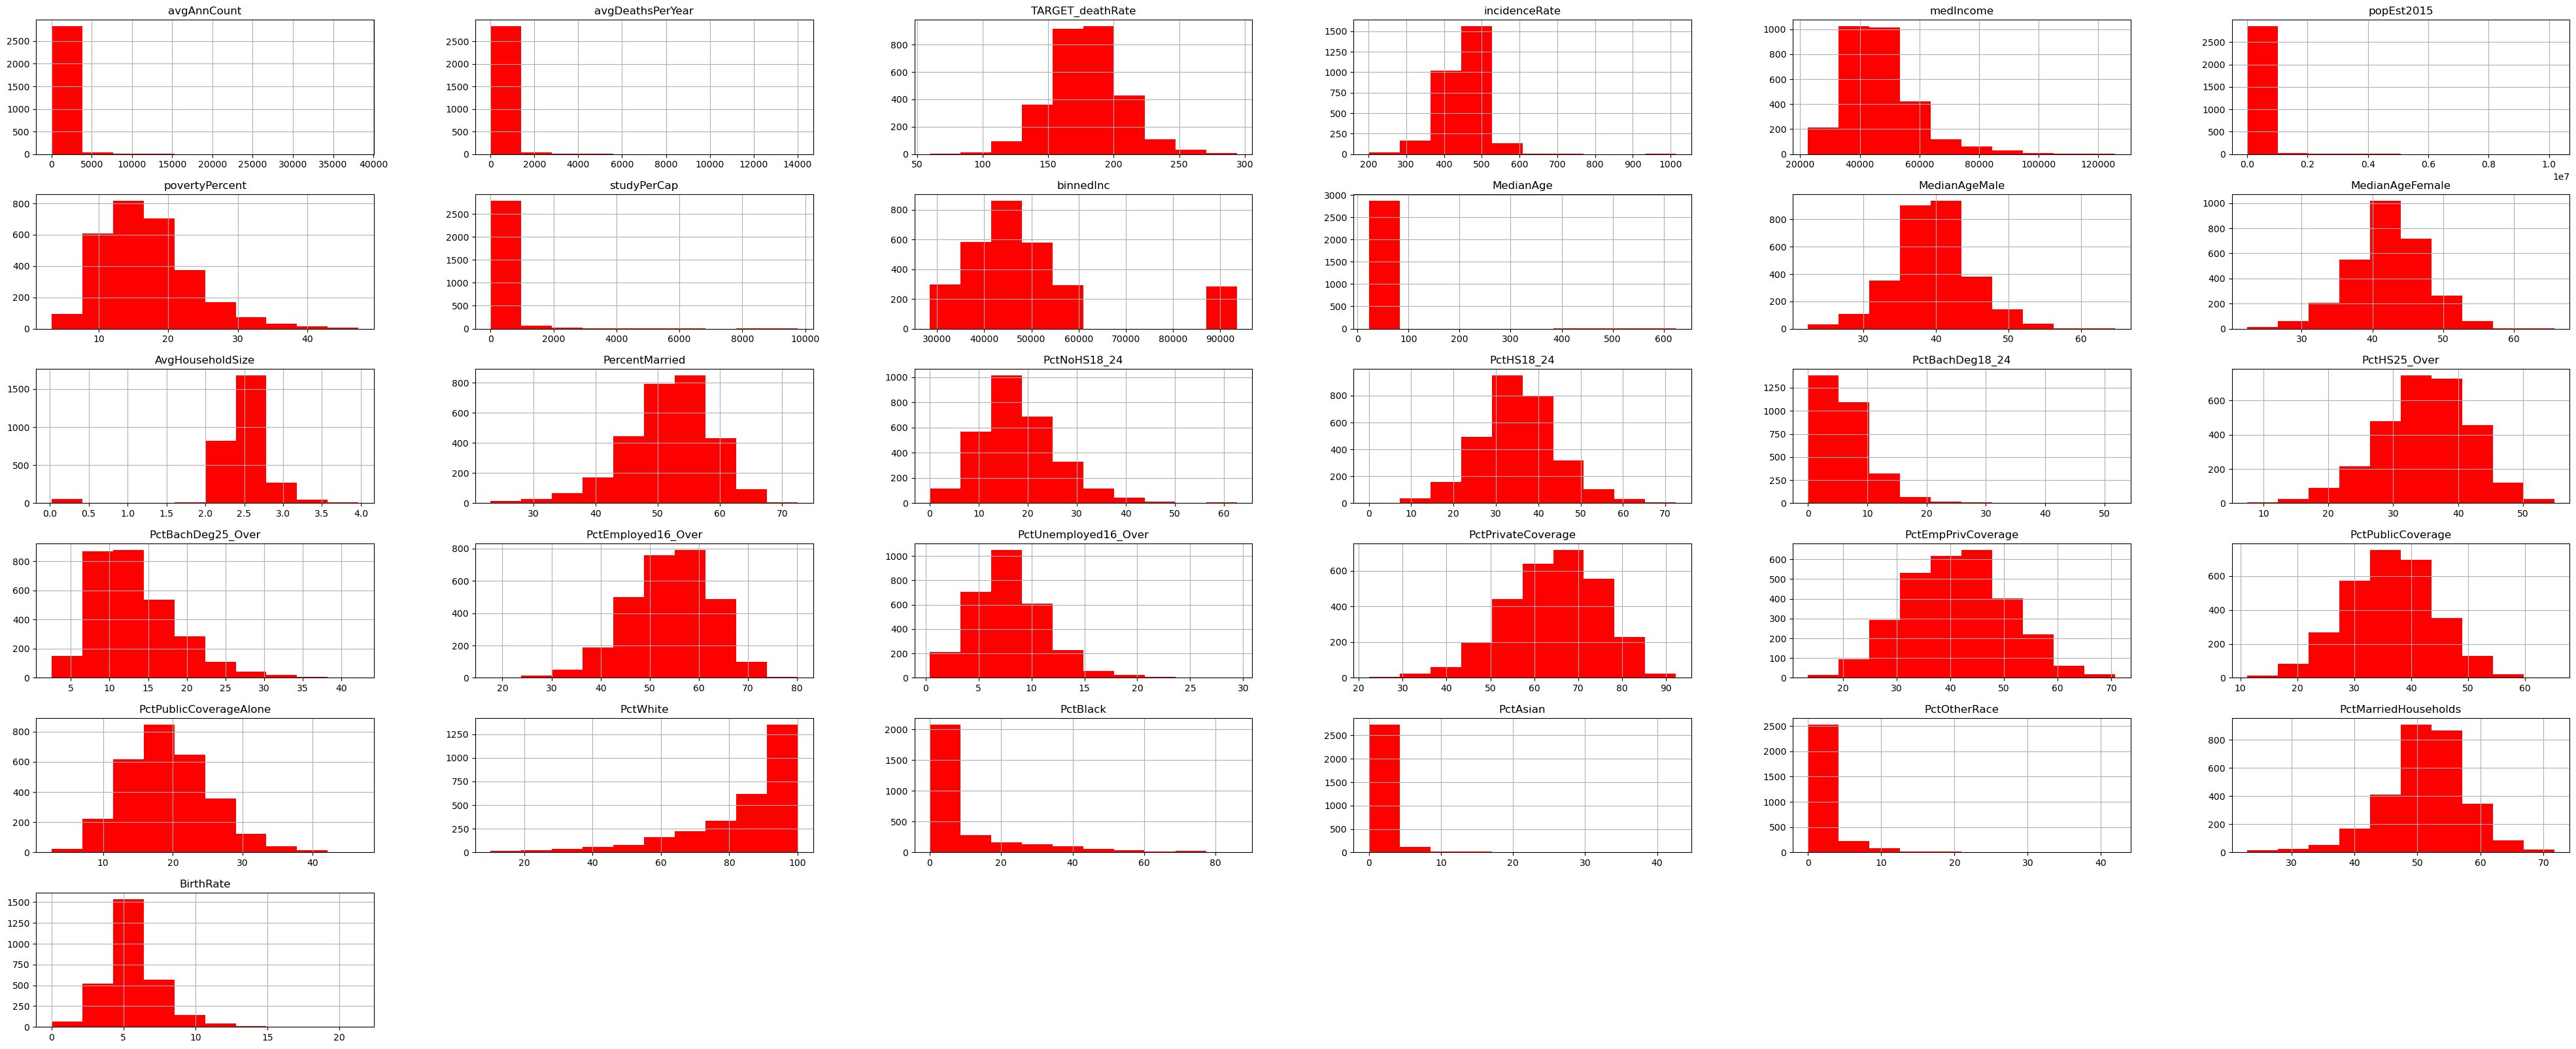

In [32]:
# Preliminary examination with Histograms
cancer_df.hist(figsize = (50,20),xlabelsize = 10 ,ylabelsize = 10, color = 'red')
plt.show()

Upon initial inspection, the majority of variables appear to exhibit a normal distribution or adhere to a discernible pattern. However, certain variables appear to warrant additional scrutiny and investigation.

In [33]:
# 1. Function that diplays histogram of the variable
def display_variable_hist(Variable, i):
    color_list = ["firebrick", "red", "orangered", "chocolate", "sandybrown", "darkorange", "orange", "gold", "limegreen",
                  "deepskyblue", "navy", "darkorchid", "magenta", "greenyellow", "yellowgreen", "forestgreen", "lime",
                  "lightseagreen", "cyan", "dodgerblue", "crimson", "deeppink", "purple", "blue",
                  "salmon", "olive", "teal", "skyblue", "indigo", "brown", "sienna", "peru", "maroon", "tan"
]


    sns.set_style("white")
    
    plt.hist(cancer_df[Variable],
            bins = 10,
            color = color_list[i])
    
    plt.title(label = "Distribution of " + Variable, fontsize = 14, weight = 'bold')
    
    sns.despine()
    
    plt.show()

In [34]:
# List the holds the names of variables
df_columns = cancer_df.columns
df_columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

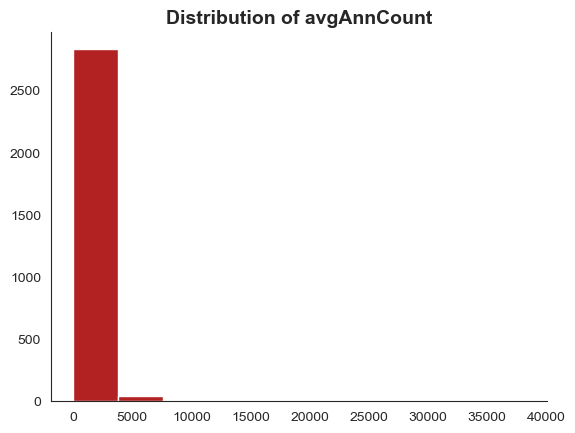

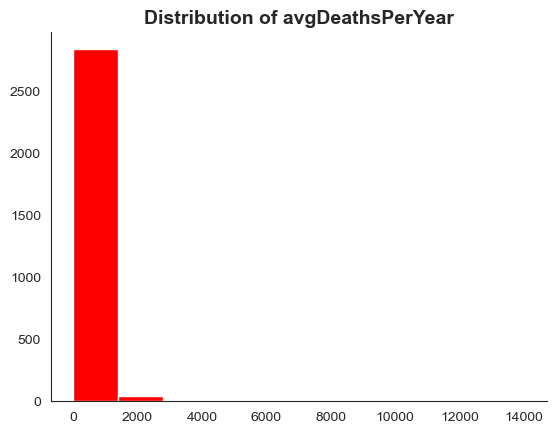

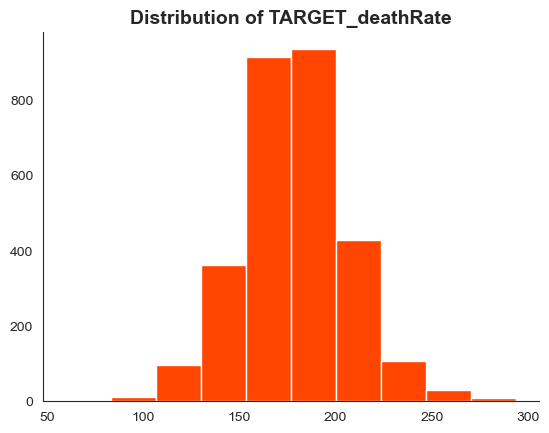

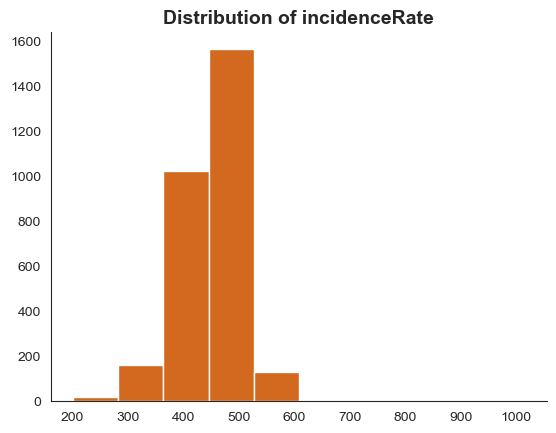

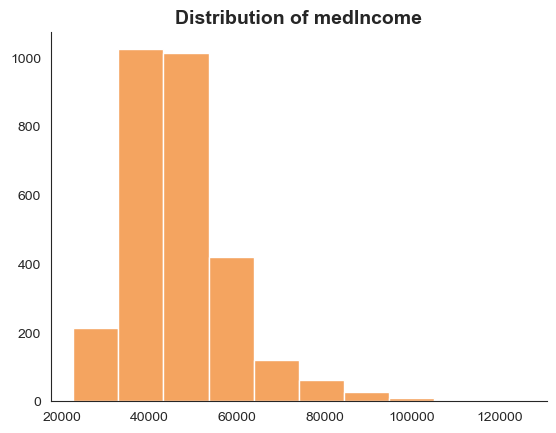

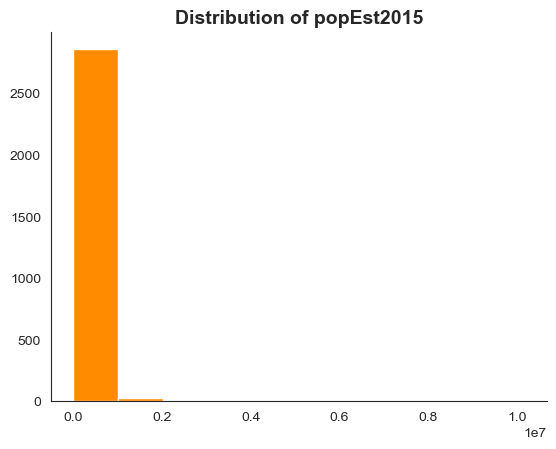

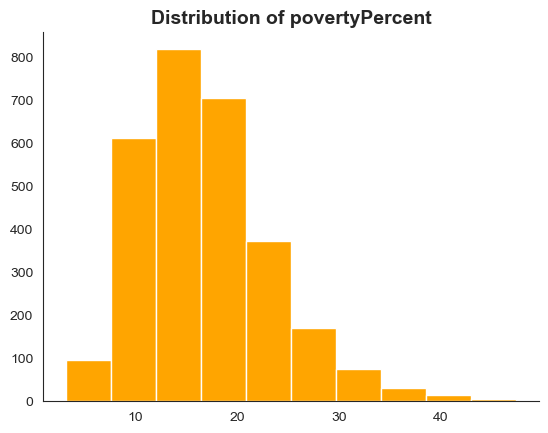

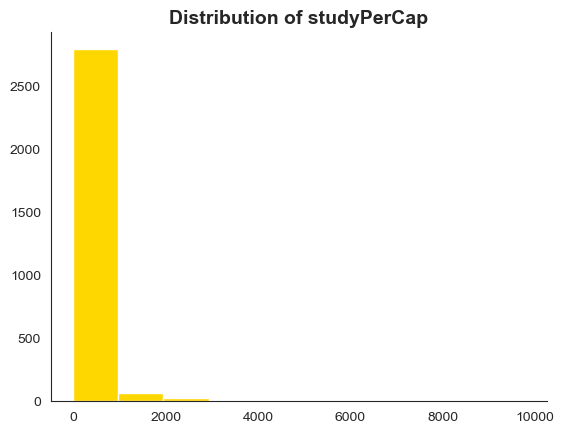

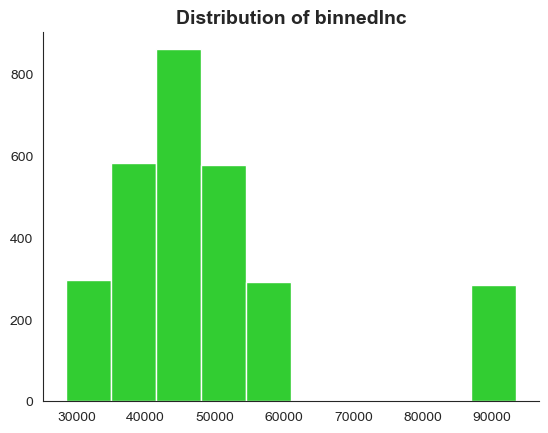

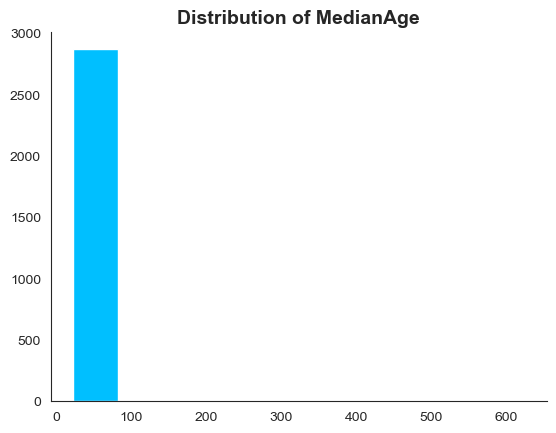

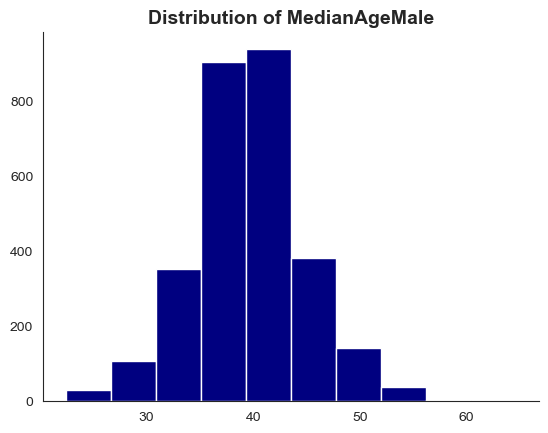

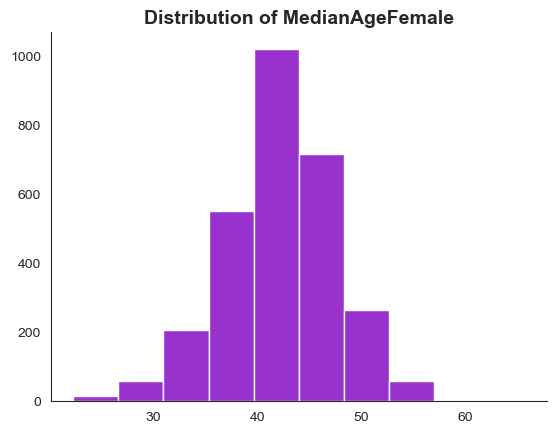

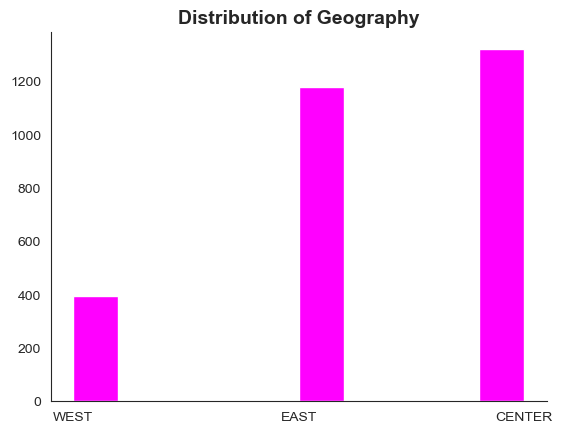

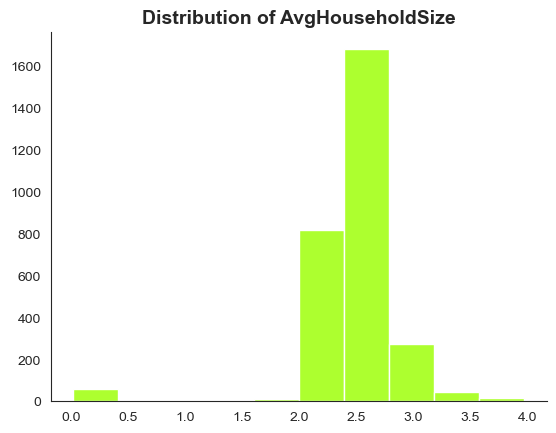

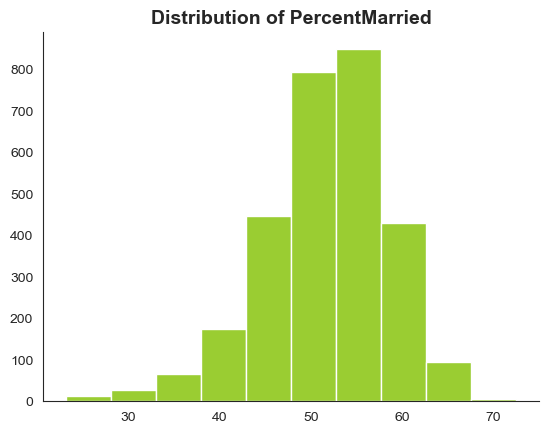

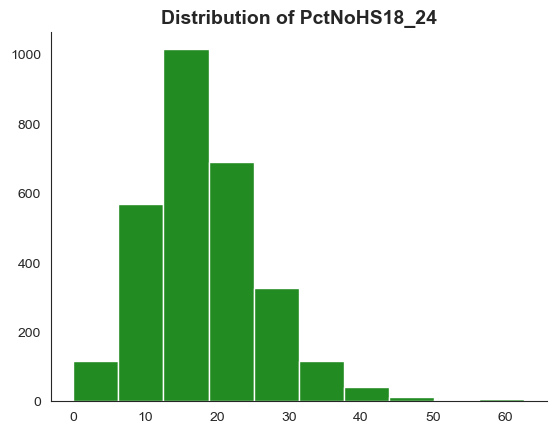

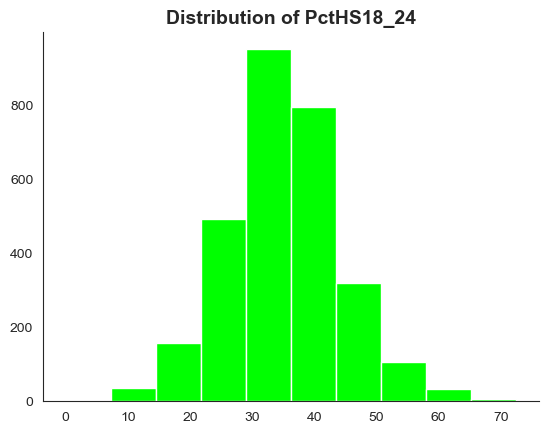

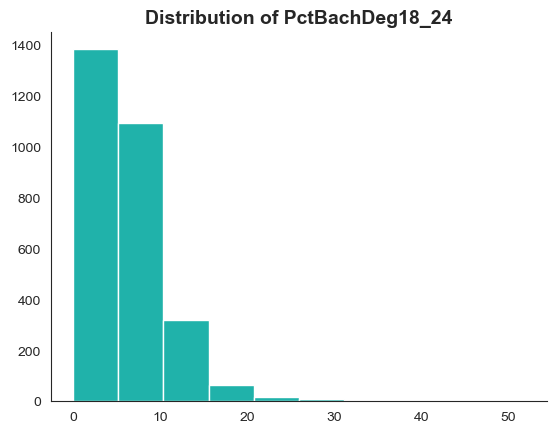

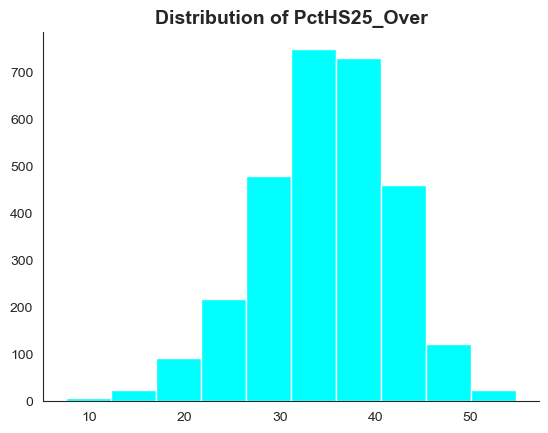

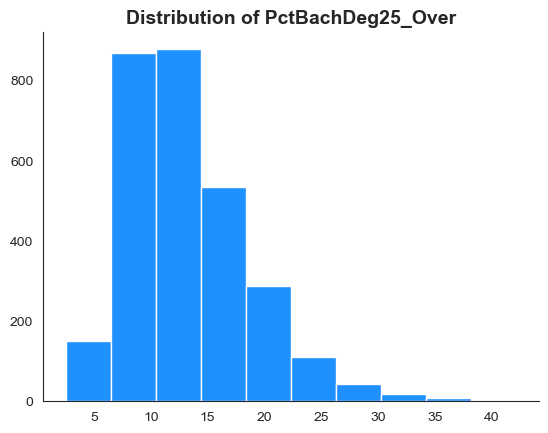

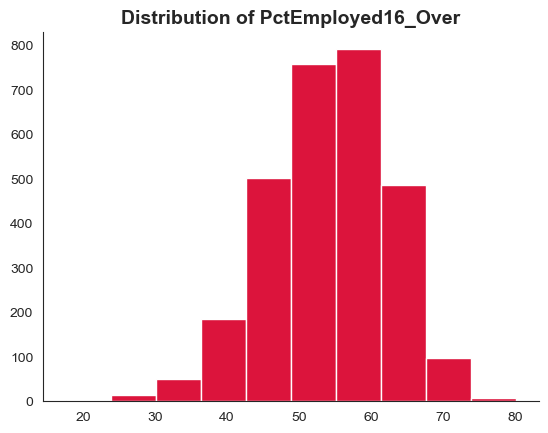

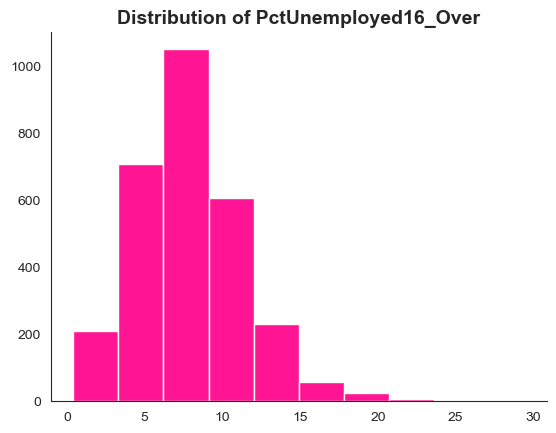

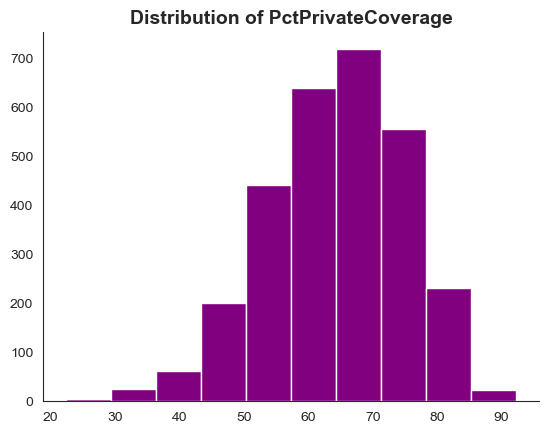

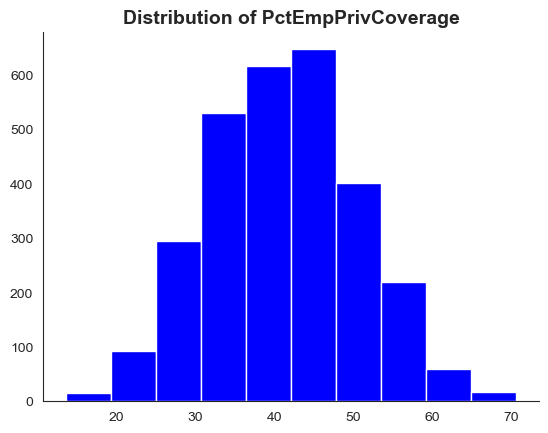

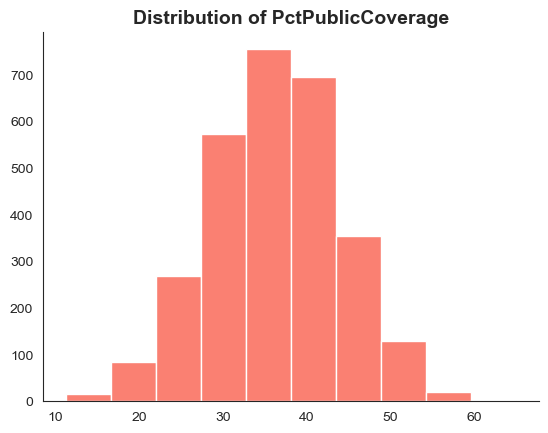

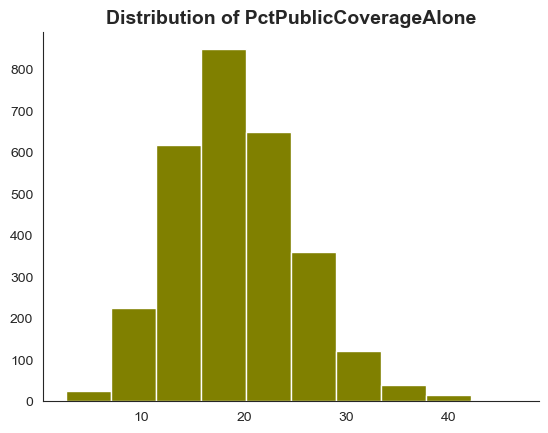

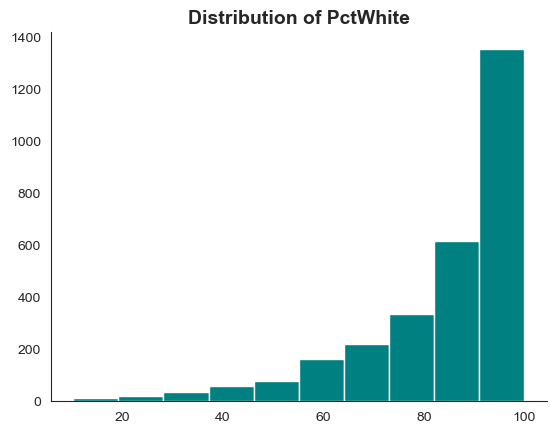

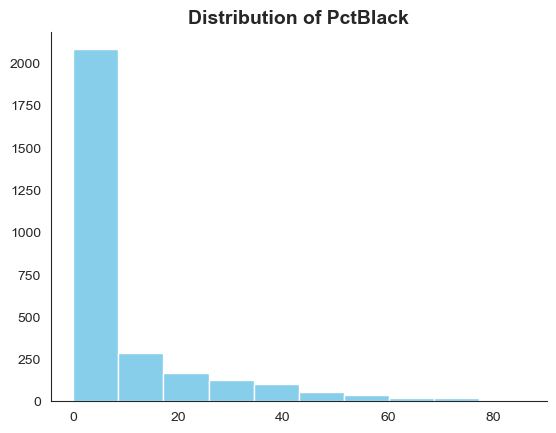

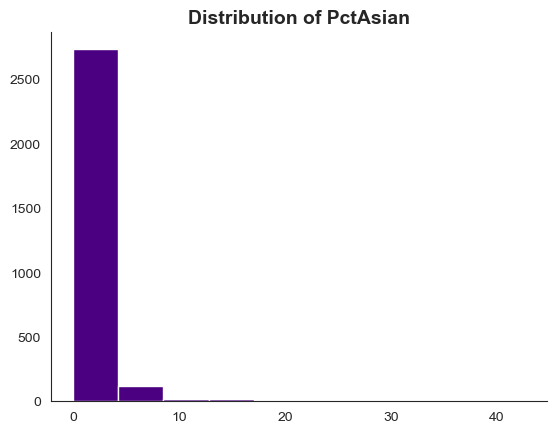

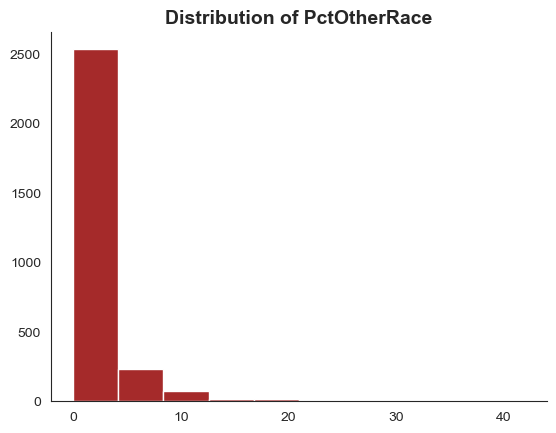

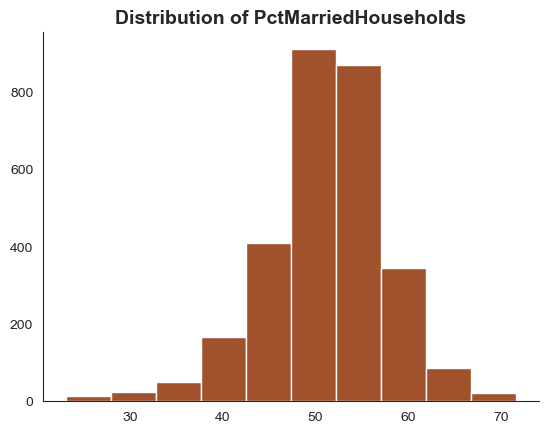

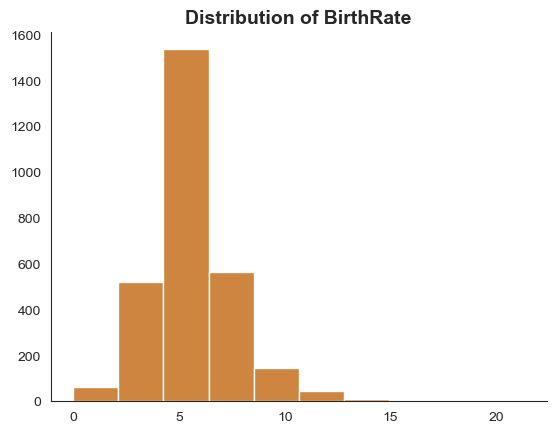

In [35]:
# Displaying the histogram of each varaible
for i in range(0,len(df_columns)):
    display_variable_hist(df_columns[i], i)

In the histograms, we notice the presence of outliers in the dataset, particularly in the "MedianAge" variable, where the x-axis extends from zero to 600. To address this issue, we plan to utilize the LocalOutlierFactor method from sklearn to identify and remove these outliers. We'll assume a contamination percentage of 15% for this analysis.

In [36]:
# Shape before inserting dummies
cancer_df.shape

(2895, 32)

In [37]:
# Getting dummy variables
cancer_df = pd.get_dummies(data = cancer_df, drop_first= True)

In [38]:
# Shape after inserting dummies and before erasing outliers
cancer_df.shape

(2895, 33)

In [39]:
# We also need to to change the dtype of the Geography variables to integer
cancer_df['Geography_EAST'] = cancer_df['Geography_EAST'].astype('int32')
cancer_df['Geography_WEST'] = cancer_df['Geography_WEST'].astype('int32')

In [40]:
# Importing the necessary library
from sklearn.neighbors import LocalOutlierFactor

# Setting the contamination parameter to 15%
lof = LocalOutlierFactor(n_neighbors =100,contamination=0.15)  # Setting the contamination parameter to 15%
outlier_labels = lof.fit_predict(cancer_df)

# Select rows where the LOF label is not -1 (not an outlier)
cancer_df = cancer_df[outlier_labels != -1]  # Select rows where the LOF label is not -1 (not an outlier)

In [41]:
# Shape after inserting dummies and erasing outliers
cancer_df.shape

(2460, 33)

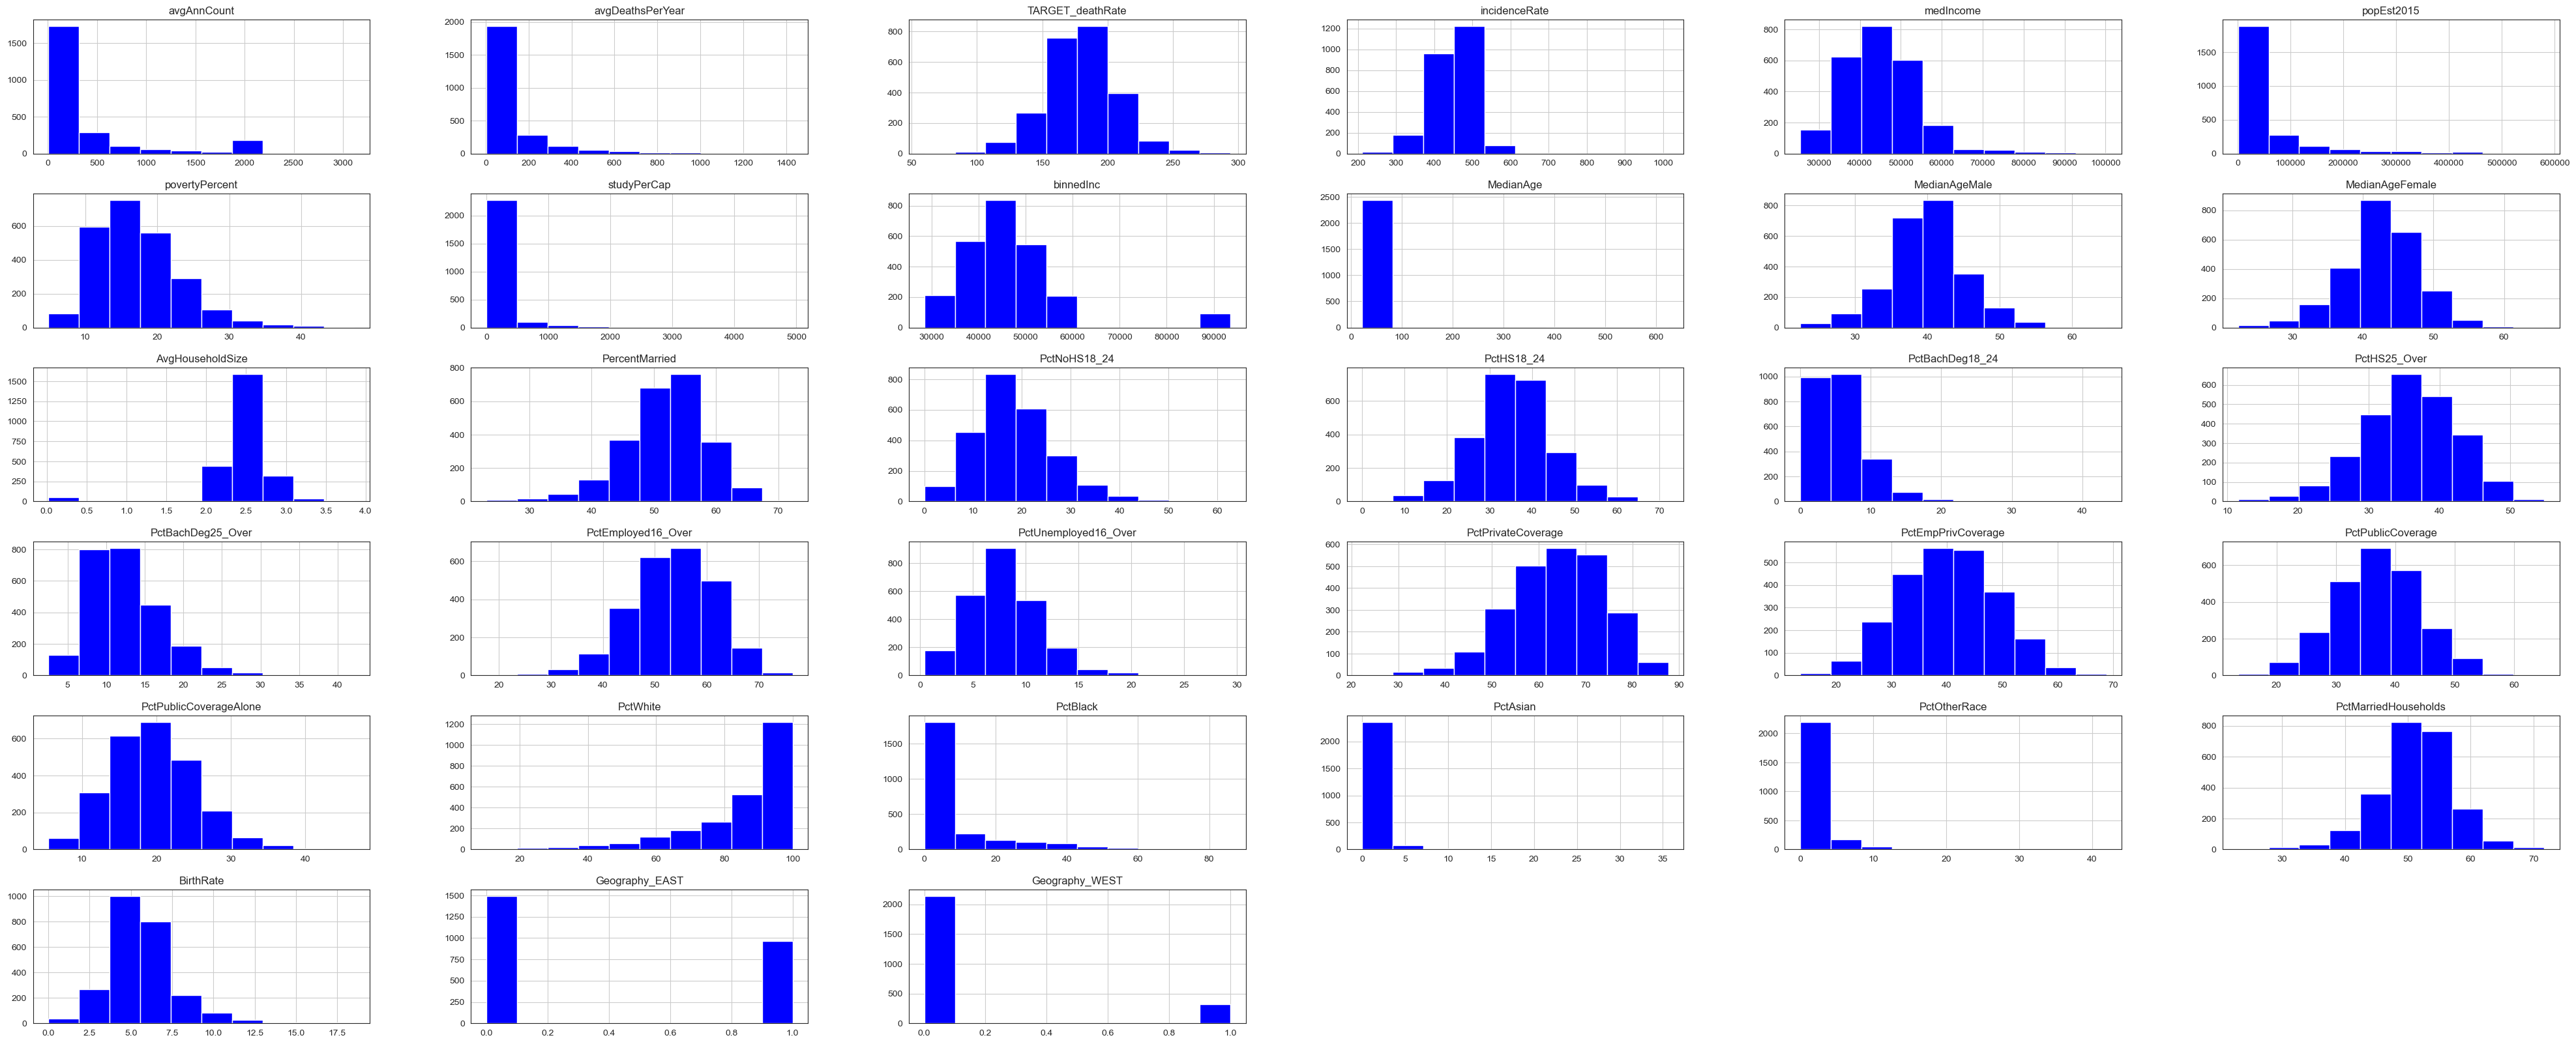

In [42]:
# Preliminary examination with histograms after outlier deletion process
cancer_df.hist(figsize = (50,20),xlabelsize = 10 ,ylabelsize = 10, color = 'blue')
plt.show()

The variable "MedianAge" still has easily spotted outliers. Therefore, we will trim it manually.

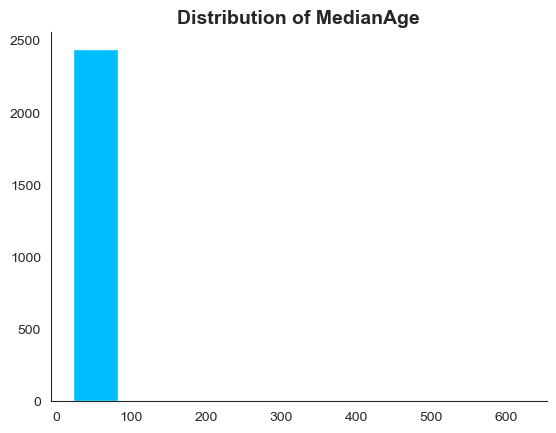

In [43]:
# Histogram before "shortening"
display_variable_hist('MedianAge',9)

In [44]:
# "Shortening" the dataframe
cancer_df = cancer_df[cancer_df['MedianAge']< 100]

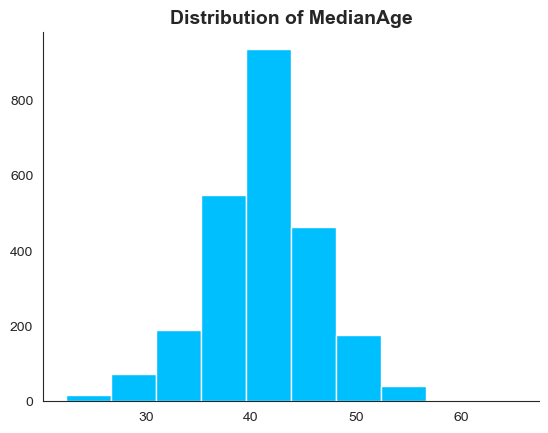

In [45]:
# Histogram after "shortening"
display_variable_hist('MedianAge',9)

## 4. SAVING THE DATASET

In [46]:
cancer_df.to_csv(r'cancer_reg_refined.csv', index=False)